In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, auc
warnings.filterwarnings("ignore") #to ignore the warnings
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
path = 'data.csv'
data = pd.read_csv(path,index_col=0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [4]:
data.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [5]:
# ID содержит уникальное значение, удалили при чтении датасета.
# Выборка содержит 32 столбца по 569 строк в каждом
# Последний столбец Unnamed: 32 содержит null, можно удалить. Для дальнейших действий он не потребуется.
data.drop(['Unnamed: 32'], axis = 1 , inplace=True)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
# Приведем целевой пар-р diagnosis к бинароному виду, М(злокачественная)-1, В(доброкачественная)-0
data.diagnosis.replace({"M":1,"B":0},inplace=True)
data.diagnosis.unique()

array([1, 0], dtype=int64)

In [7]:
# Получим основную статистику для количественных признаков
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


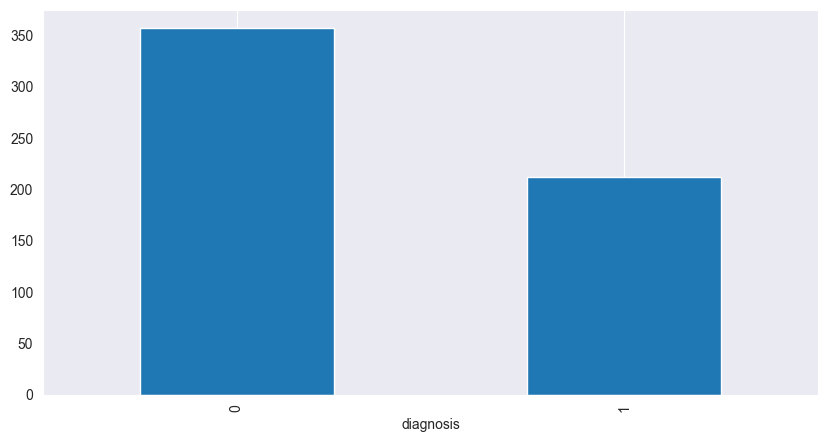

In [8]:
# Распределение целевой переменной
data['diagnosis'].value_counts().plot.bar(figsize=(10, 5))
plt.grid(axis='y')

In [9]:
data['diagnosis'].value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

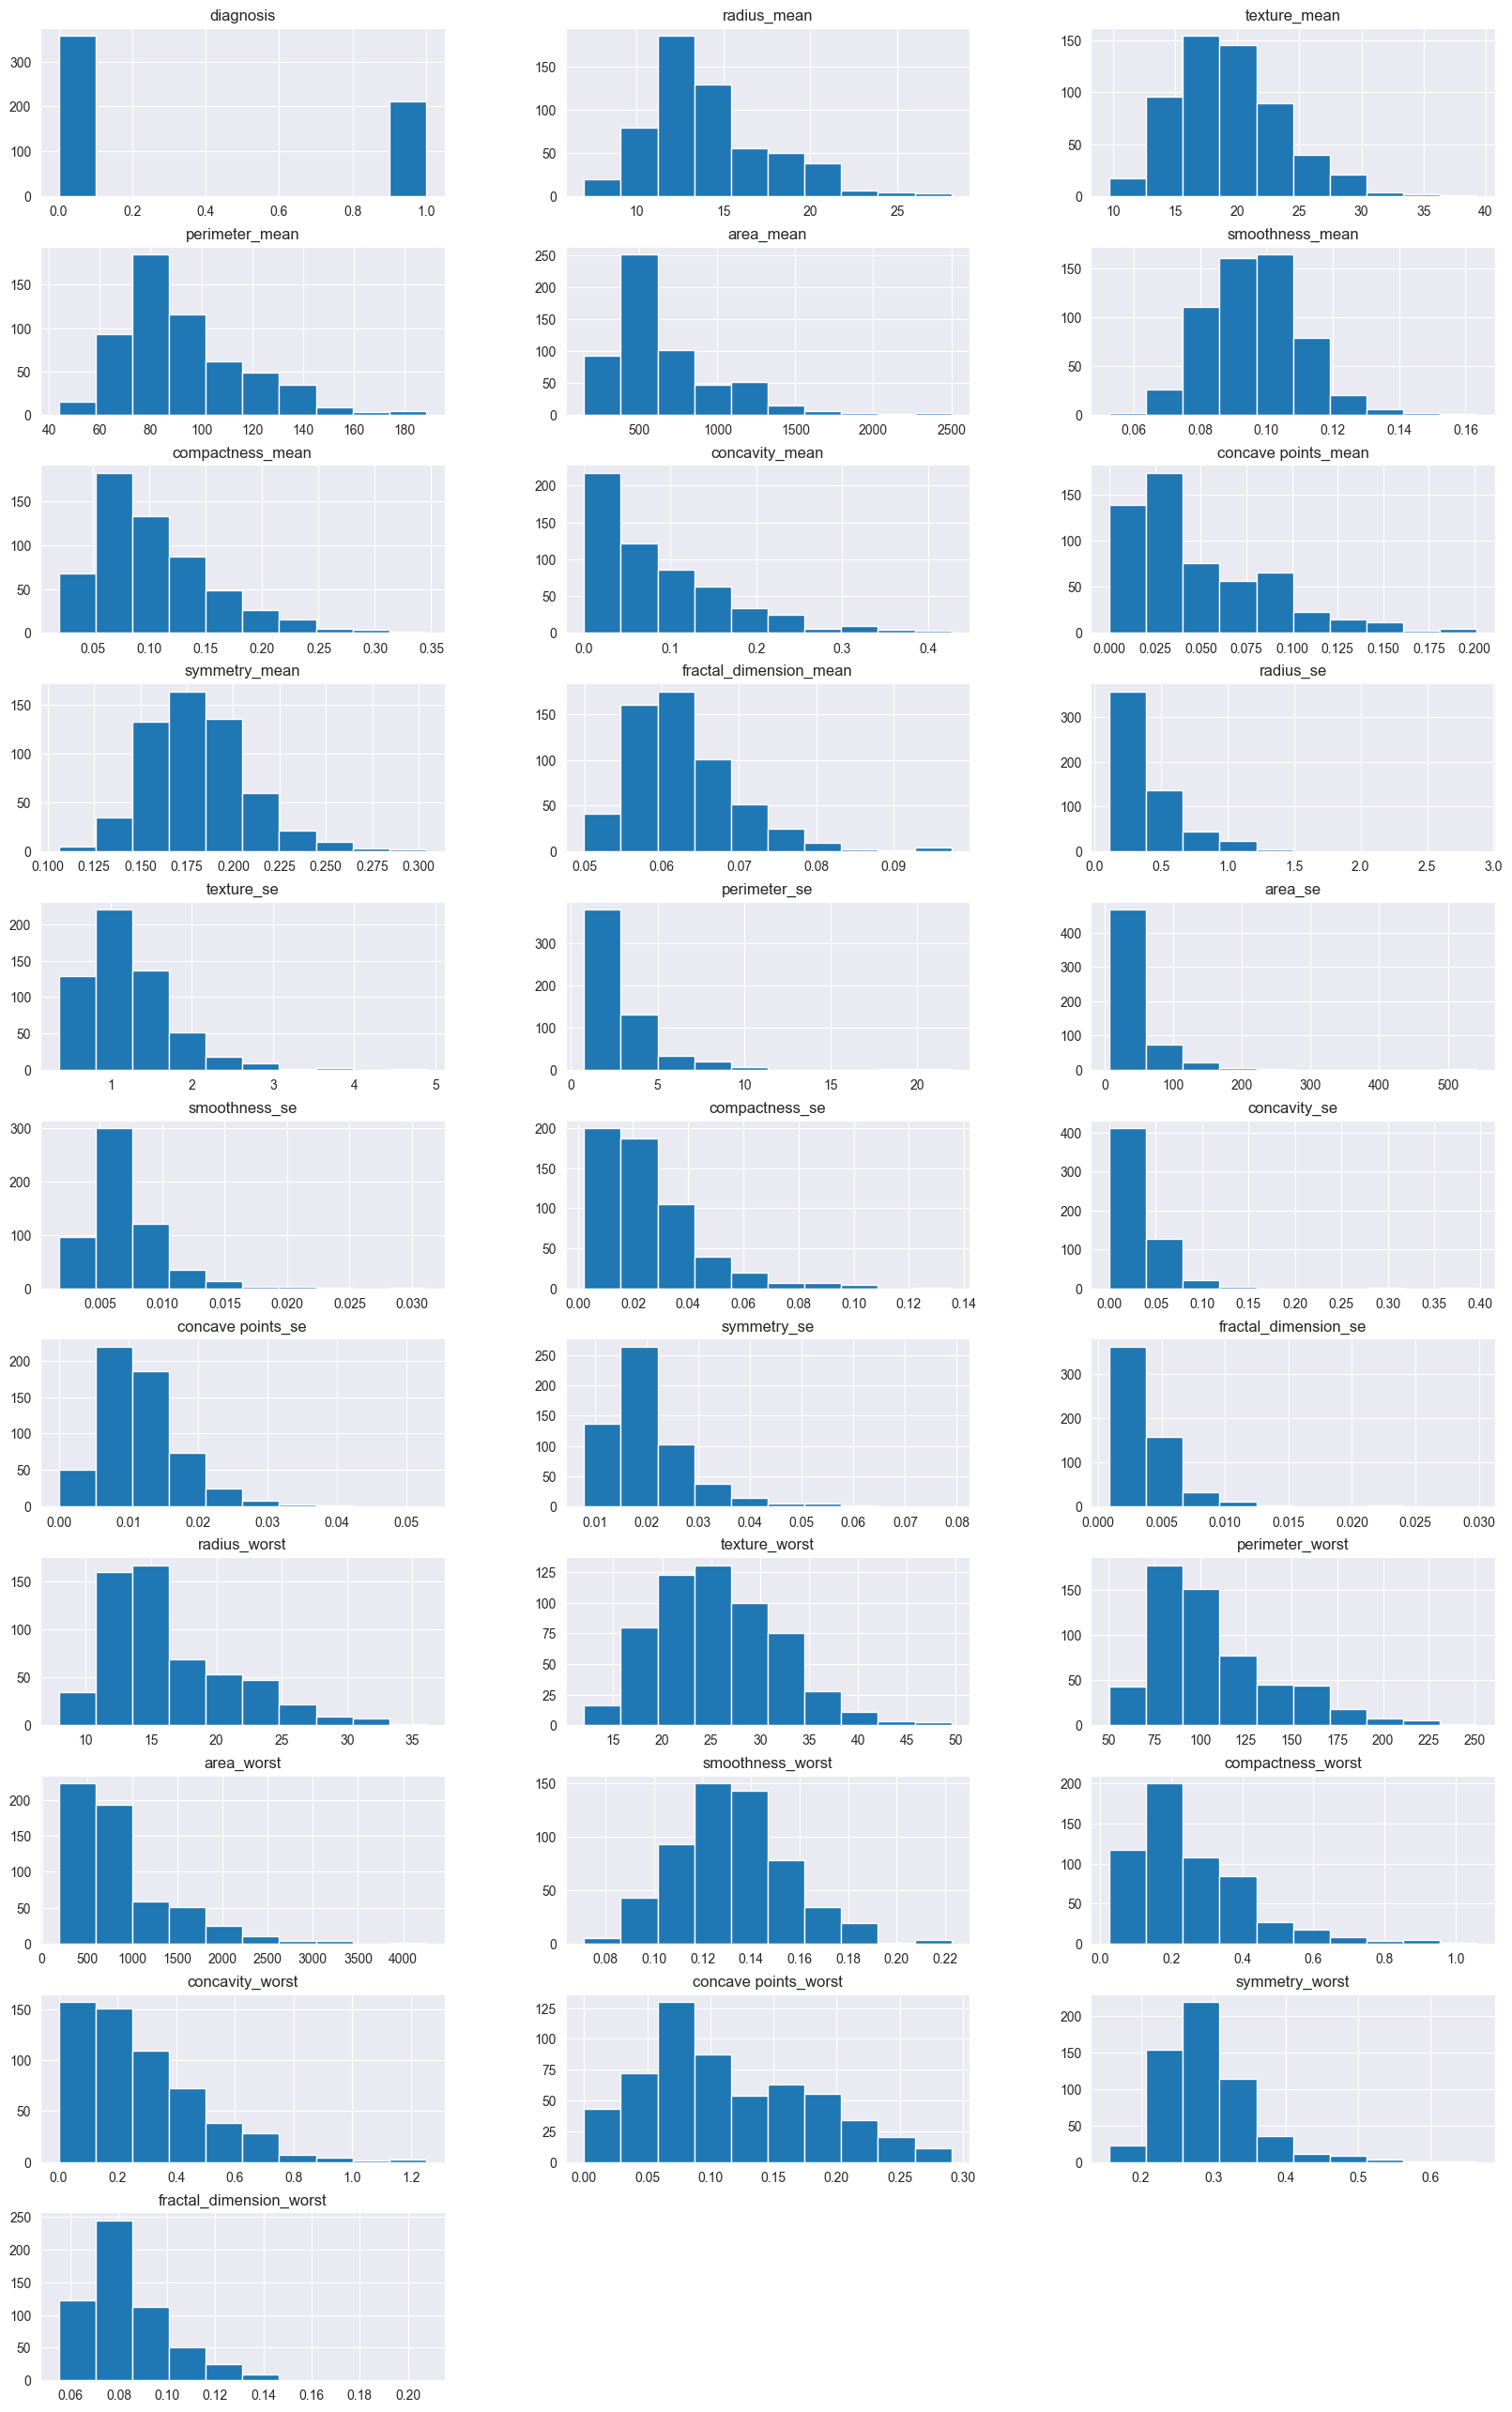

In [10]:
# data.hist(figsize=(10, 30));
cols = len(data.select_dtypes('number').columns)
data.select_dtypes('number').hist( layout = (cols,3) , figsize = (20,3*cols))
plt.show()

Text(0.5, 1.0, 'Correlation Map')

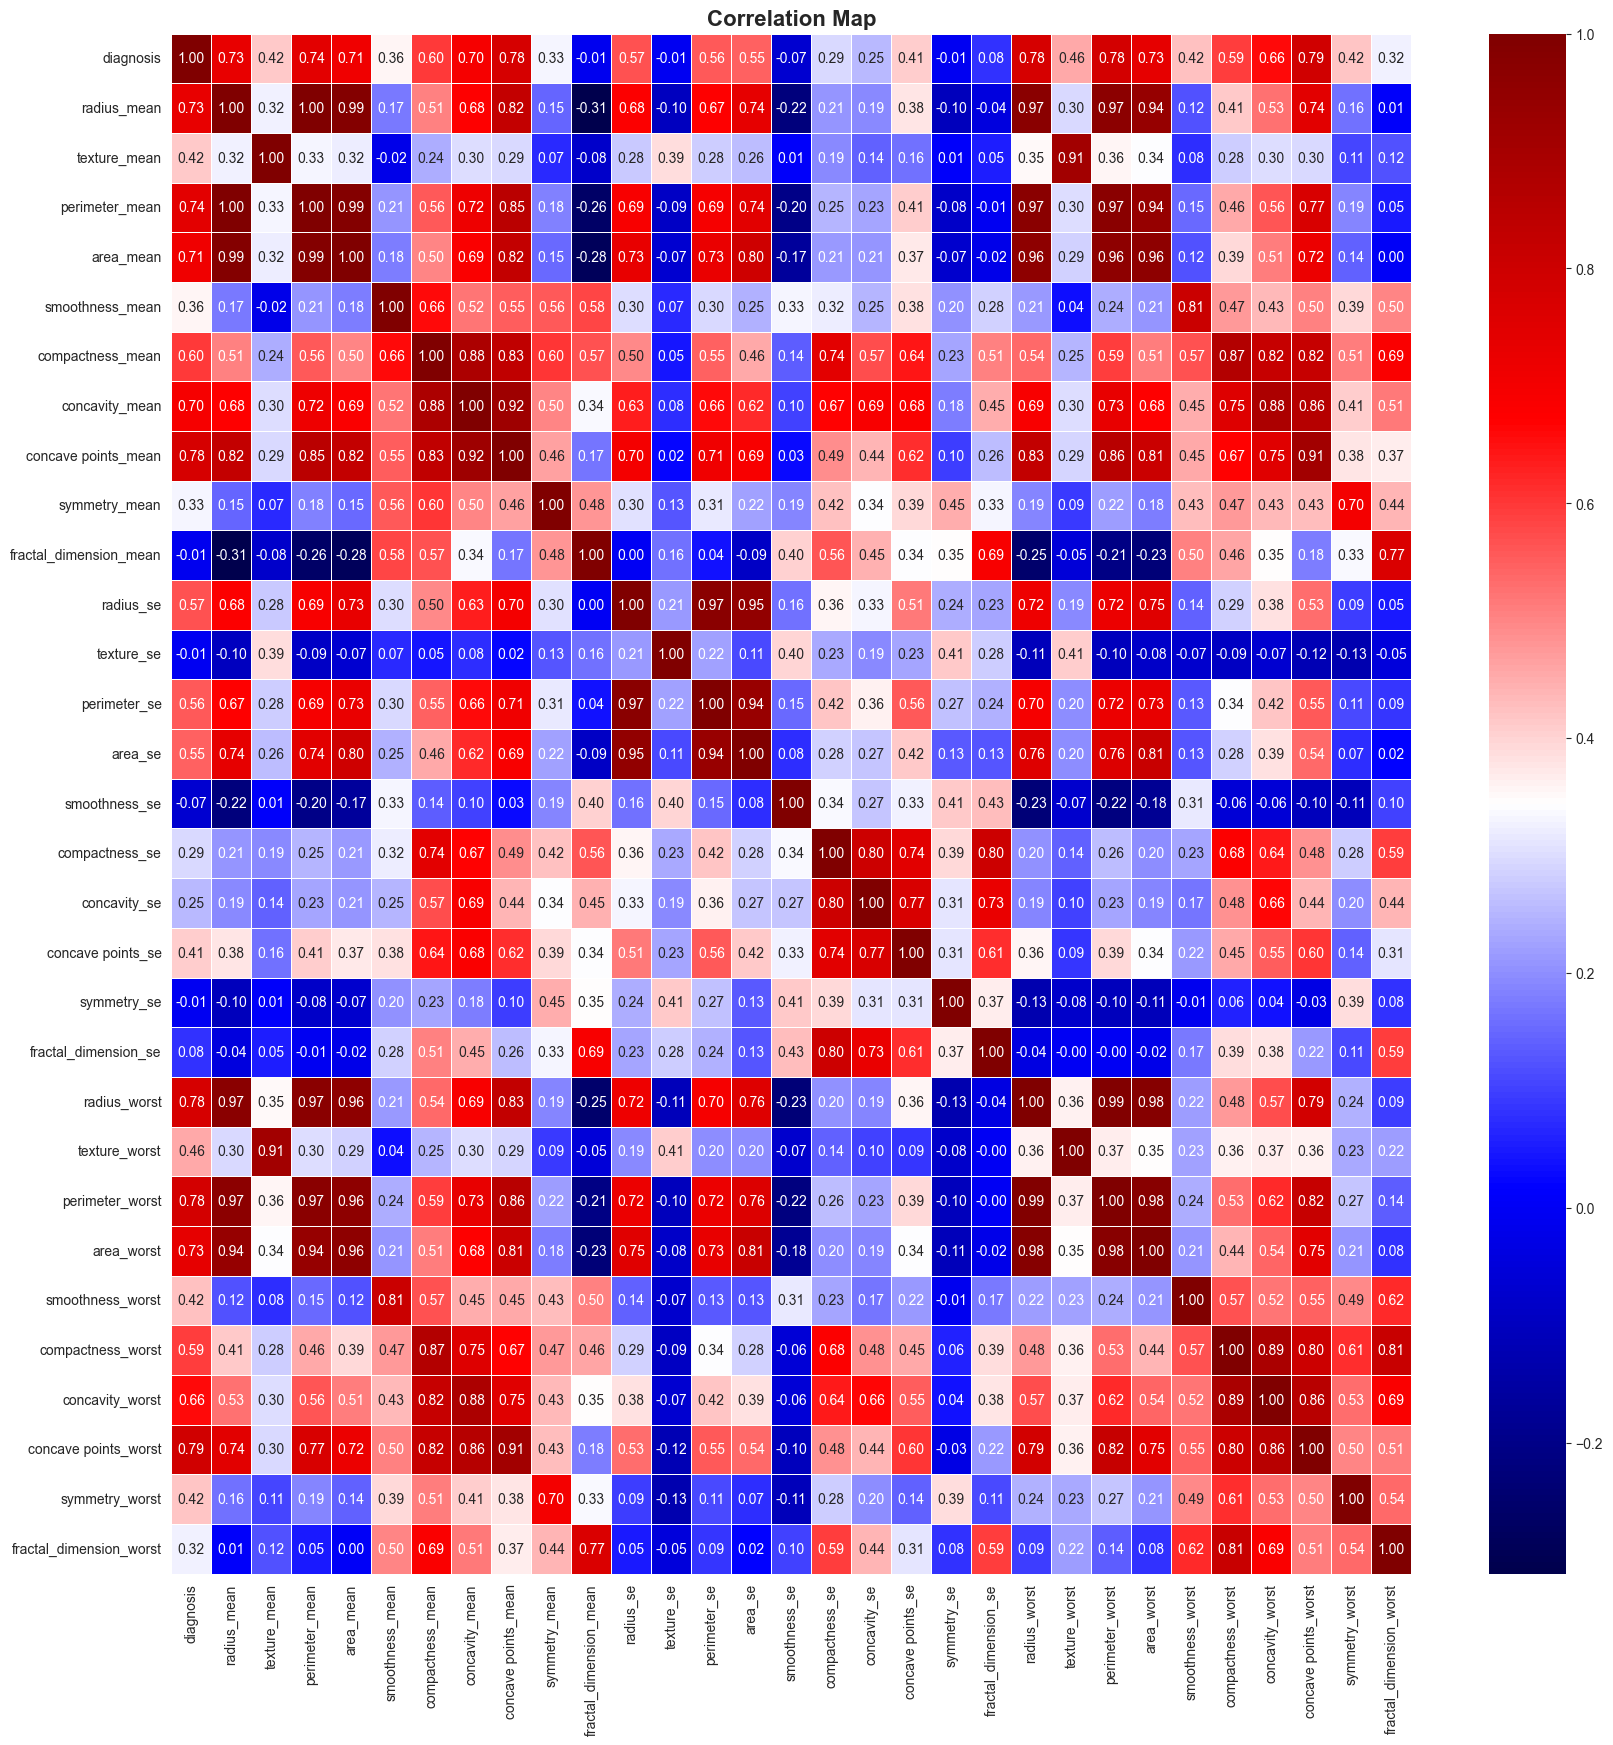

In [10]:
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap='seismic', annot = True, linewidths=.5, fmt= '.2f')
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

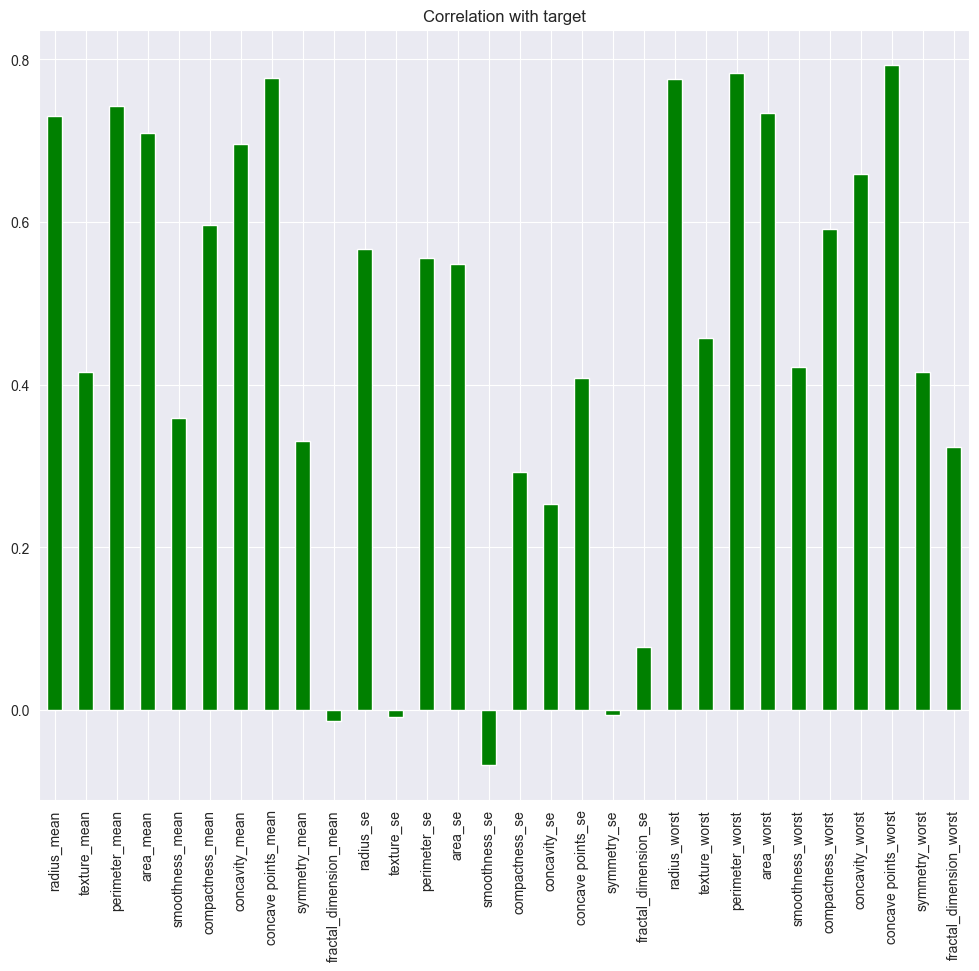

In [14]:
data.drop('diagnosis', axis=1).corrwith(data.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10),
                                                             title="Correlation with target",color="green");

In [11]:
# Оставим признаки, где корреляция с диагнозом больше 70%
cols = corr[abs(corr['diagnosis']) > 0.70].index.tolist()
cols

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

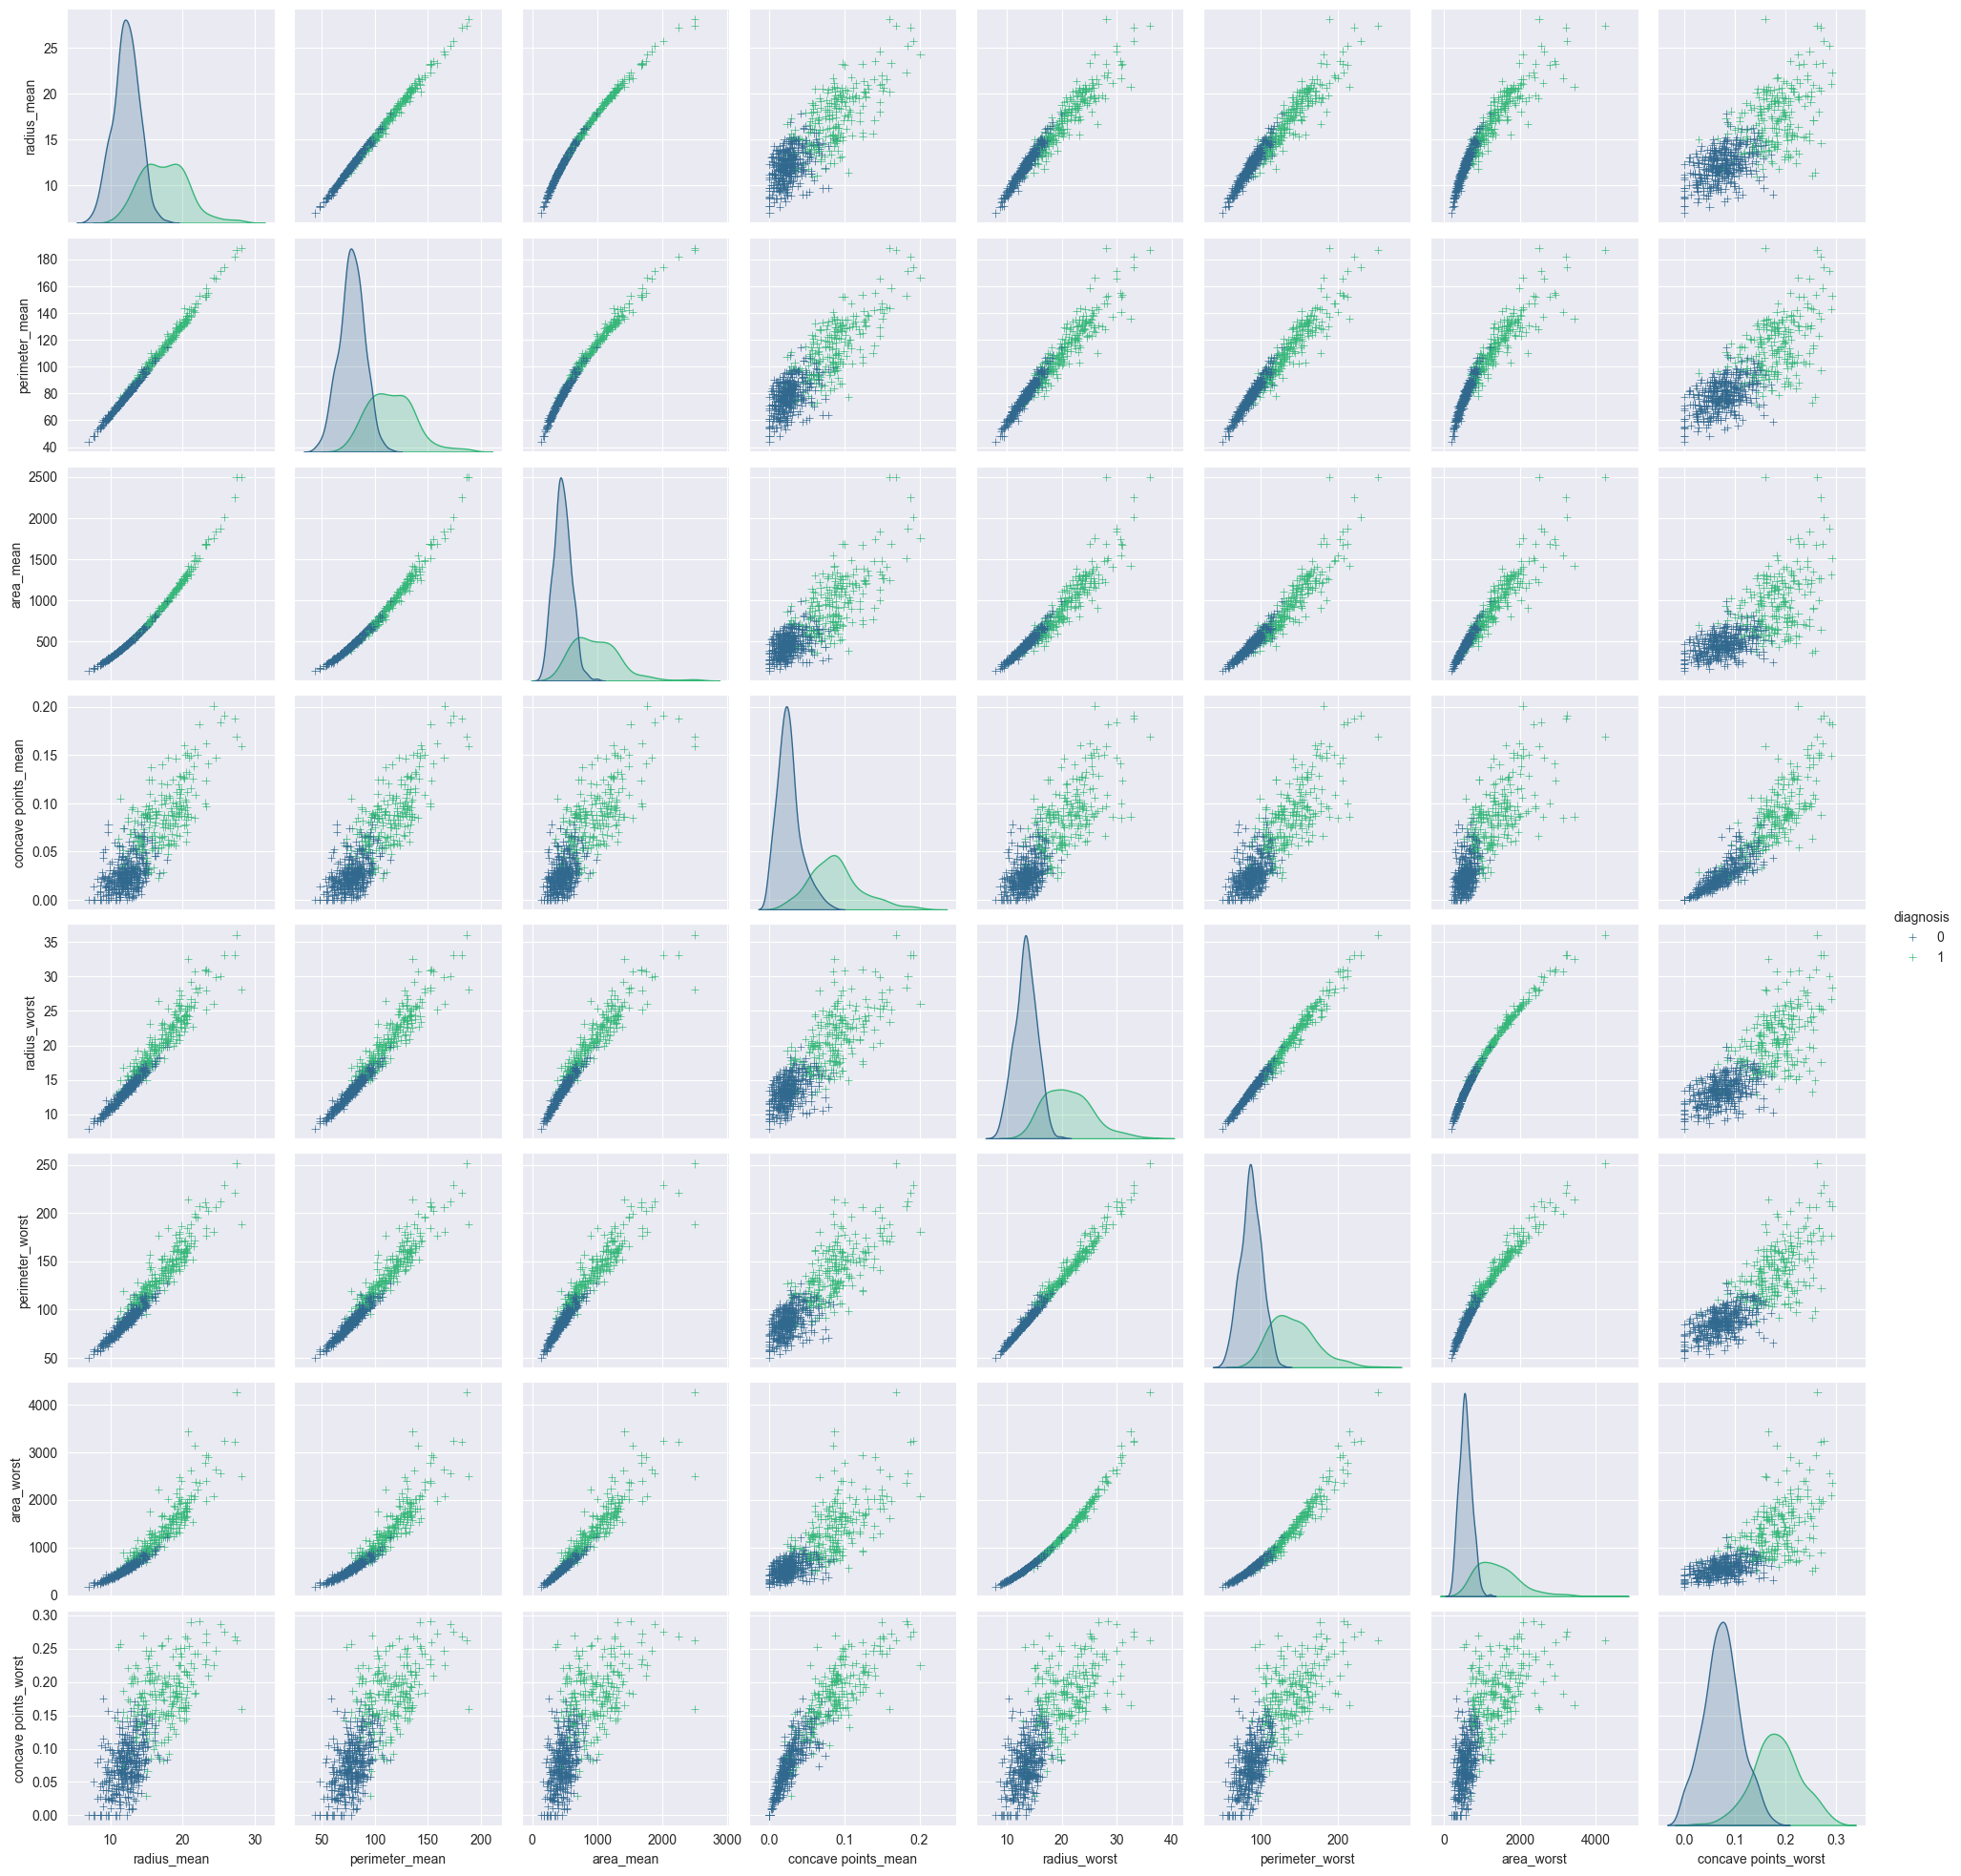

In [16]:
#pair plot
sns.pairplot(data[cols], diag_kind = "kde", markers = "+", hue = "diagnosis", palette='viridis')
plt.show()

<Figure size 1200x800 with 0 Axes>

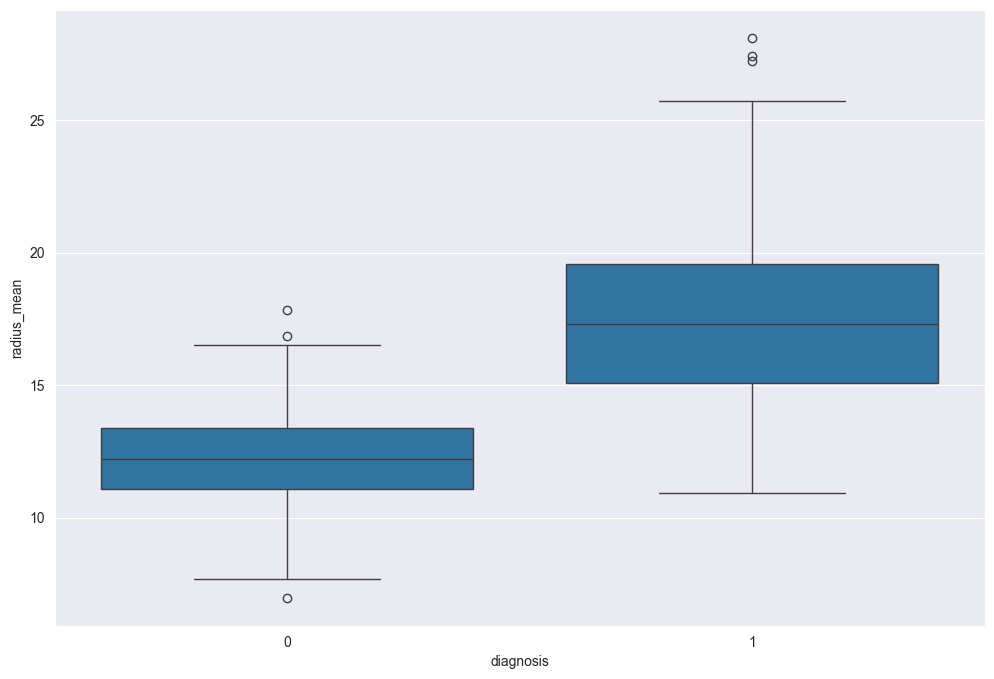

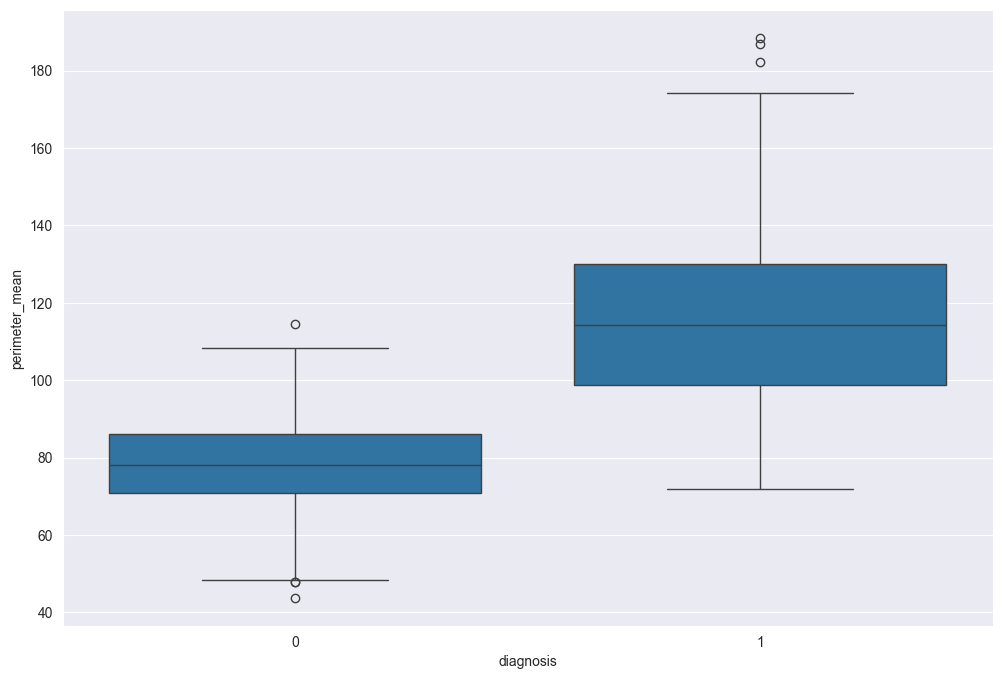

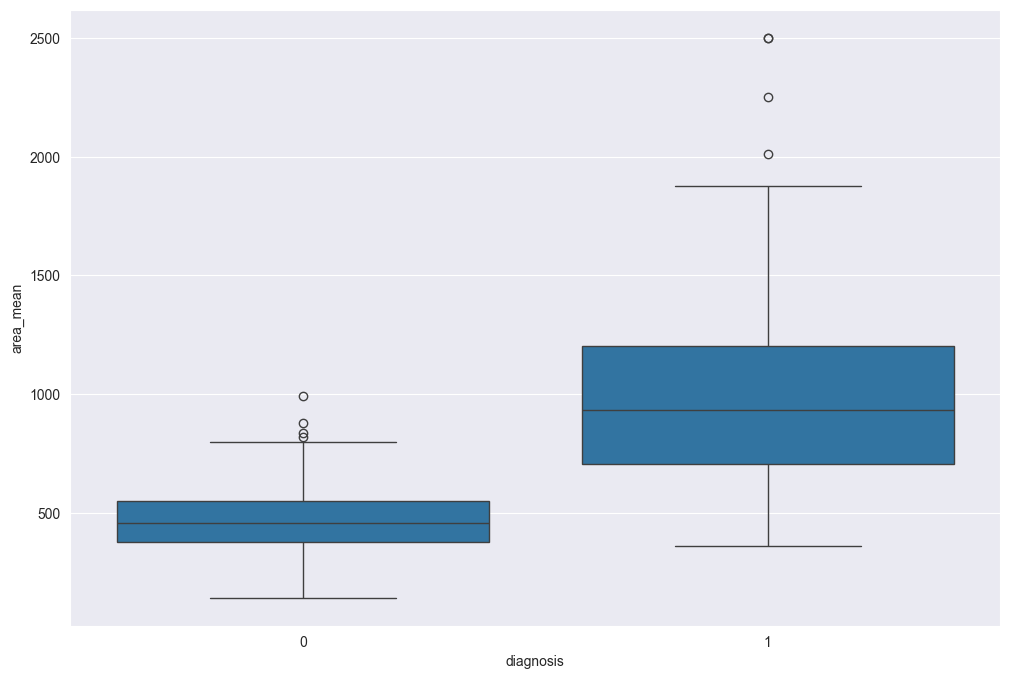

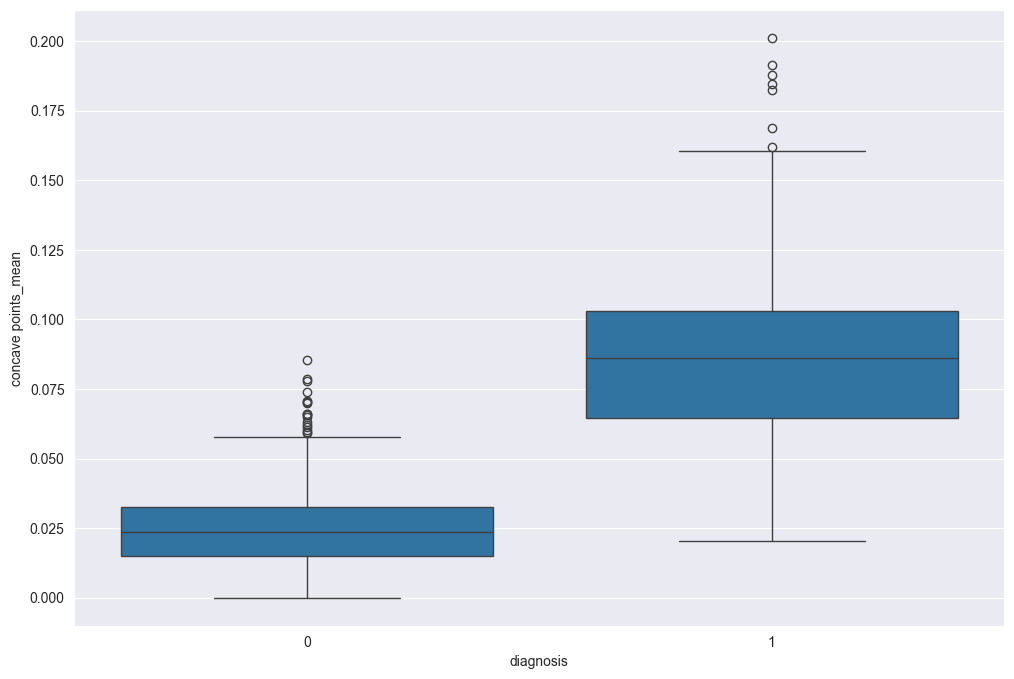

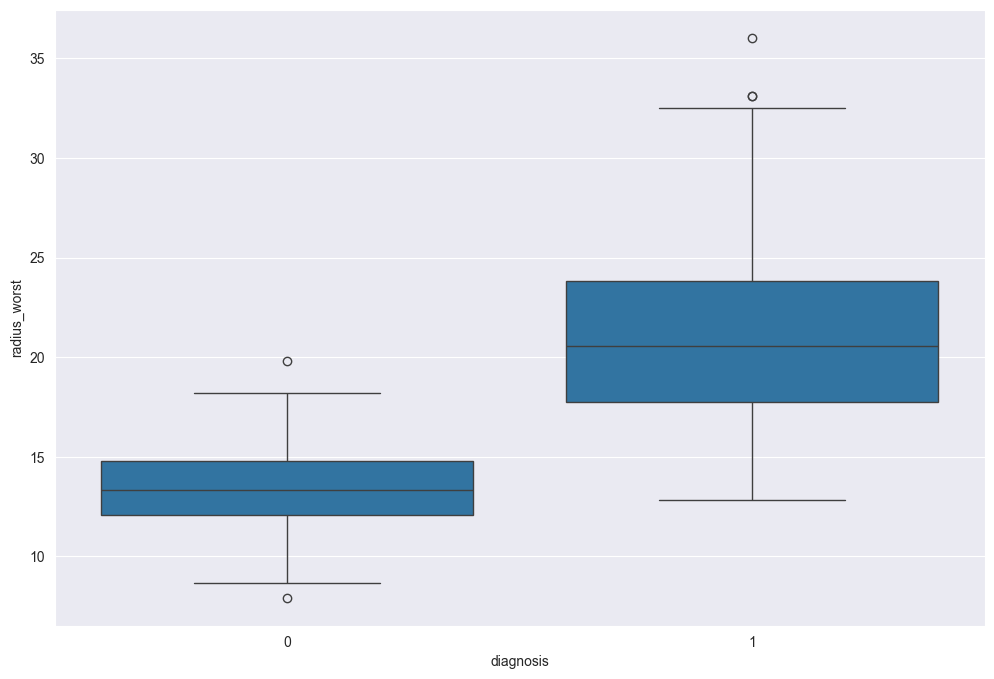

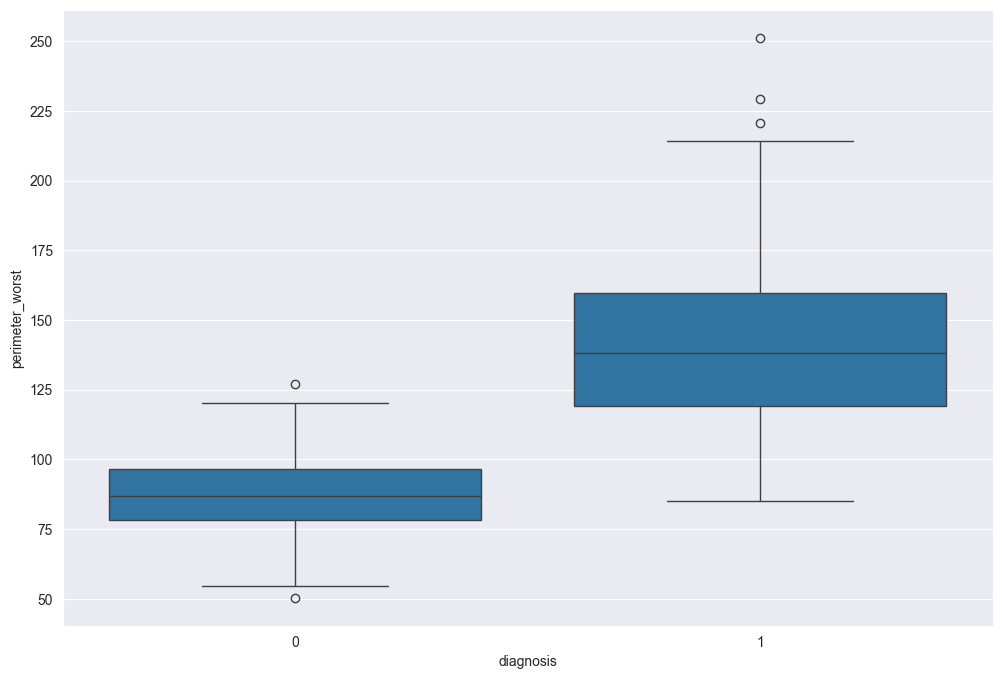

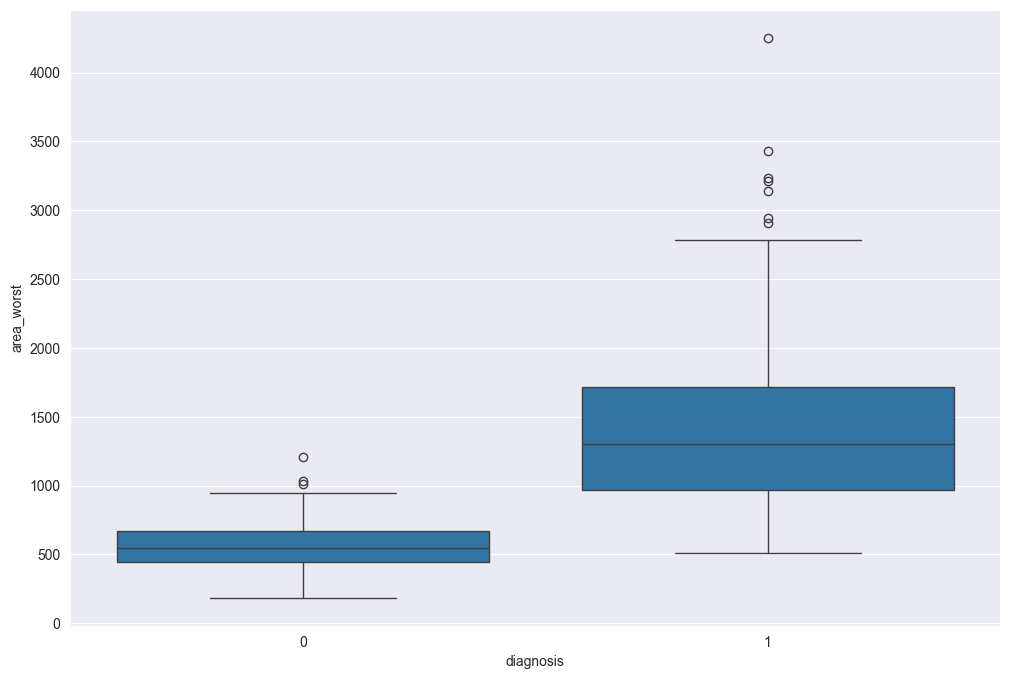

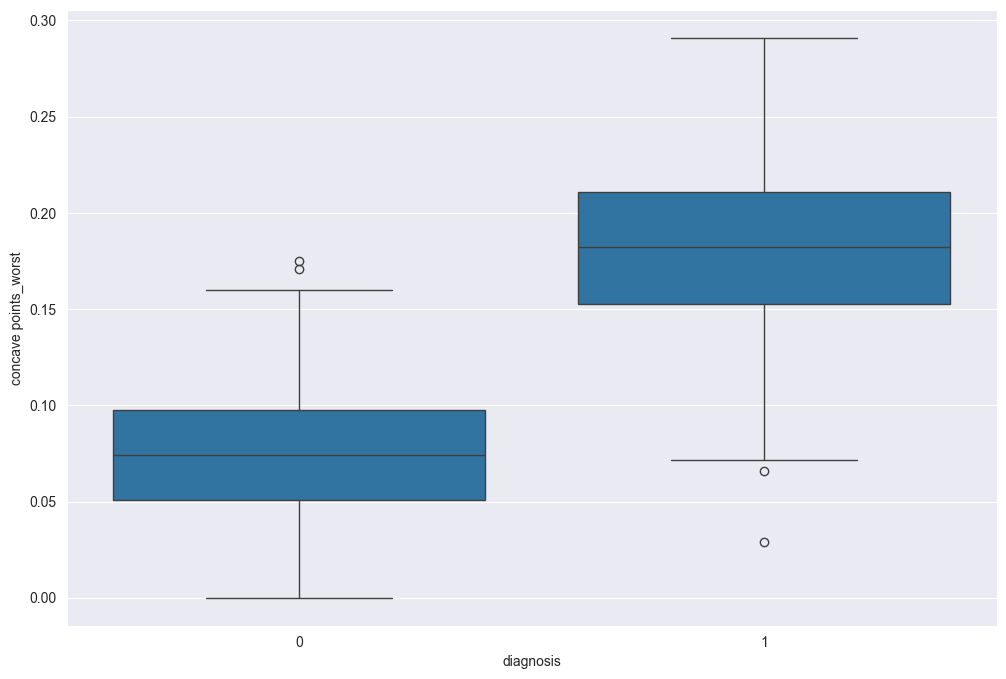

In [17]:
for m in cols:
    plt.figure(figsize=(12,8))
    if m == 'diagnosis':
        continue
    sns.boxplot(y = data[m] , x  = data['diagnosis'] )
    plt.show()

 По всем признакам основная часть набора данных(интерквартильный размах), соответственно и медианы этих признаков находиятся в разных диапазонах
 radius mean,perimeter_mean,concave points_worst - Данные с 1 Q1 и Q2  пересекаются с данными из Q4,Q3,Q2 0. Есть выбросы
 area_mean,radius_worst,perimeter_worst,area_worst - так же как у трех признаков выше, но у 1 более широкий размах данных по сравнению с 0
 concave points_mean - данные по диагнозам находятся в разных диапазонах, но есть выбросы. Необходимо оптимизировать или посмотреть кол-во выбросов, можно попробовать удалить и не учитывать 

In [12]:
# # Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.30, random_state=42, stratify=data['diagnosis']
)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [14]:
# Так как у признаков разный масшттаб значений необходимо выполнить стандартизацию
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Создаем модель kNN
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [39]:
# Обучаем модель на обучающем наборе данных
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [40]:
# Предсказываем метки классов для тестового набора данных
y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)

In [41]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [42]:
# Оцениваем метрики качества
print("Train quality:")
quality_report(y_pred_train, y_train)
print("\nTest quality:")
quality_report(y_pred_test, y_test)

Train quality:
Accuracy: 0.972
Precision: 0.932
Recall: 0.993
f1_score: 0.962

Test quality:
Accuracy: 0.965
Precision: 0.906
Recall: 1.000
f1_score: 0.951


In [43]:
from sklearn.metrics import roc_auc_score
# Вычисляем ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_test)
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.953125


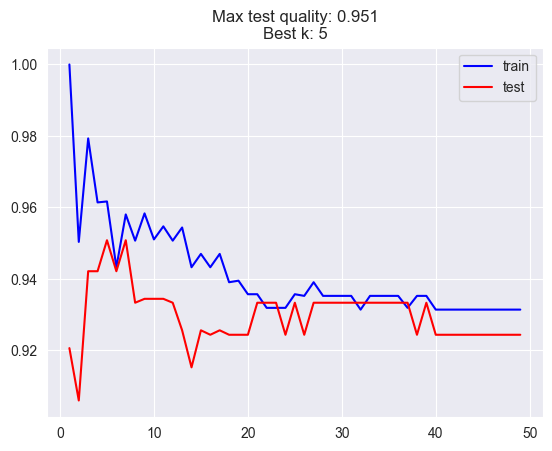

In [44]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

In [45]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5

KNeighborsClassifier()

In [46]:
# Обучаем модель на обучающем наборе данных
knn5.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [47]:
# Предсказываем метки классов для тестового набора данных
y_pred_train = knn5.predict(X_train_scaled)
y_pred_test = knn5.predict(X_test_scaled)

In [48]:
# Оцениваем метрики качества при n_neighbors=5
print("Train quality:")
quality_report(y_pred_train, y_train)
print("\nTest quality:")
quality_report(y_pred_test, y_test)

Train quality:
Accuracy: 0.972
Precision: 0.932
Recall: 0.993
f1_score: 0.962

Test quality:
Accuracy: 0.965
Precision: 0.906
Recall: 1.000
f1_score: 0.951


In [51]:
# После измнения кол-ва соседей метрики качества не изменились т.к. в KNeighborsClassifier по умолчанию n_neighbors=5